<a href="https://colab.research.google.com/github/kartik-sethi/Brain-Tumor-Detection/blob/main/Code/brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting files from zip
from zipfile import ZipFile
dataset="/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [ ]:
from zipfile import ZipFile
dataset="/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [ ]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as py
# import os
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2

In [ ]:
path = "/content/brain_tumor_dataset"
image_paths = list(paths.list_images(path))
# print(image_paths)
images = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    # print(image)
    image = cv2.resize(image, (224, 224))
    images.append(image)
    if label=='no':
     labels.append(0)
    else:
      labels.append(1)
print(labels)
print(len(images))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
253


In [ ]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


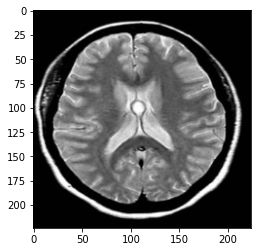

In [ ]:
def plot_image(image):
    plt.imshow(image)
plot_image(images[0])

In [ ]:
import numpy as np
images = np.array(images) / 255.0
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(images, labels, test_size= 0.10, random_state= 42, stratify= labels)

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)

(227, 224, 224, 3)
(227,)
(26, 224, 224, 3)


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3), trainable=False)

In [ ]:
no_of_classes=2
model= tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(no_of_classes)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(train_X,train_Y,epochs=30)

Epoch 1/30
8/8 [==============================] - 11s 748ms/step - loss: 0.5947 - acc: 0.6564
Epoch 2/30
8/8 [==============================] - 6s 729ms/step - loss: 0.4392 - acc: 0.8150
Epoch 3/30
8/8 [==============================] - 6s 728ms/step - loss: 0.3594 - acc: 0.8678
Epoch 4/30
8/8 [==============================] - 6s 719ms/step - loss: 0.3149 - acc: 0.8678
Epoch 5/30
8/8 [==============================] - 6s 722ms/step - loss: 0.2703 - acc: 0.9163
Epoch 6/30
8/8 [==============================] - 6s 720ms/step - loss: 0.2507 - acc: 0.9251
Epoch 7/30
8/8 [==============================] - 6s 734ms/step - loss: 0.2264 - acc: 0.9251
Epoch 8/30
8/8 [==============================] - 6s 730ms/step - loss: 0.2142 - acc: 0.9339
Epoch 9/30
8/8 [==============================] - 6s 727ms/step - loss: 0.1962 - acc: 0.9427
Epoch 10/30
8/8 [==============================] - 6s 732ms/step - loss: 0.1844 - acc: 0.9427
Epoch 11/30
8/8 [==============================] - 6s 739ms/step - l

In [ ]:
score, acc= model.evaluate(test_X,test_Y)
print('test loss', score)
print('test accuracy', acc)

1/1 [==============================] - 1s 1s/step - loss: 0.1387 - acc: 0.9615
test loss 0.1386808156967163
test accuracy 0.9615384340286255


In [ ]:
tf.keras.models.save_model(model,'my_model.hf5')

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def load_model():
   model=tf.keras.models.load_model('/content/my_model.hf5')
   return model
model=load_model()
st.title('Brain Tumor Analysis')
st.subheader('A CNN model that detects brain tumor using MRI images')
  
image = Image.open('/content/brain-tumor-detection-mri (1).png')
st.image(image)
file=st.file_uploader("please upload the image", type=["jpg","jpeg","png"])
import cv2
from PIL import Image,ImageOps
import numpy as np
def import_and_predict(img,model):
     data=np.ndarray(shape=(1,224,224,3))
     image=img
     size=(224,224)
     image=ImageOps.fit(image,size,Image.ANTIALIAS)
     image_array=np.asarray(image)
     normalized_img_array=(image_array/225)
     data[0]=normalized_img_array
     prediction=model.predict(data)
     return np.argmax(prediction)
if file is None:
   st.text("please upload an image file")
else:
   image=Image.open(file)   
   st.image(image,use_column_width=True)
   input_pred_label=import_and_predict(image,model)
   if input_pred_label==0:
     string ="NO brain tumor is detected"
   else:
     string ="Brain tumor is detected"
   st.success(string)



Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


npx: installed 22 in 3.191s



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.199.32.198:8501

your url is: https://evil-paths-lie-35-199-32-198.loca.lt
2022-11-15 08:37:50.821825: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
1/1 [==============================] - 0s 446ms/step


In [ ]:
from google.colab.patches import cv2_imshow
input_img_path=input('path of image to be predicted:')
input_img= cv2.imread(input_img_path)
cv2_imshow(input_img)
input_image_resized= cv2.resize(input_img, (224,224))
image_resized_scaled=input_image_resized/255
image_reshaped= np.reshape(image_resized_scaled,[1,224,224,3])
image_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(image_prediction)
if input_pred_label==0: 
  print('no brain tumor detected')
else:
 print(' brain tumor detected')

KeyboardInterrupt: ignored

In [ ]:
print(image_reshaped)

[[[[0.07058824 0.07843137 0.07843137]
   [0.07058824 0.07843137 0.07843137]
   [0.07058824 0.07843137 0.07843137]
   ...
   [0.07058824 0.09019608 0.08235294]
   [0.07058824 0.09019608 0.08235294]
   [0.07058824 0.09019608 0.08235294]]

  [[0.03529412 0.04313725 0.04313725]
   [0.03529412 0.04313725 0.04313725]
   [0.03529412 0.04313725 0.04313725]
   ...
   [0.07058824 0.09019608 0.08235294]
   [0.07058824 0.09019608 0.08235294]
   [0.07058824 0.09019608 0.08235294]]

  [[0.00392157 0.00784314 0.00784314]
   [0.00392157 0.00784314 0.00784314]
   [0.00392157 0.00784314 0.00784314]
   ...
   [0.07058824 0.09019608 0.08235294]
   [0.07058824 0.09019608 0.08235294]
   [0.07058824 0.09019608 0.08235294]]

  ...

  [[0.         0.00392157 0.00392157]
   [0.         0.00784314 0.00784314]
   [0.00392157 0.01176471 0.01176471]
   ...
   [0.10196078 0.10980392 0.10980392]
   [0.09019608 0.10980392 0.10588235]
   [0.09411765 0.11372549 0.10980392]]

  [[0.         0.00392157 0.00392157]
   [0. 

In [ ]:
pre=model.predict(train_X)
print(np.argmax(pre,axis=1))

8/8 [==============================] - 7s 839ms/step
[0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 0 1 1 1]


In [ ]:
train_Y.shape

(227,)

In [ ]:
print(train_Y)

[0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1
 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 0 1 1 1]
